<a href="https://colab.research.google.com/github/wjdolan/DS_Portfolio/blob/main/MC_timeanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyze Price Series with Monte Carlo (Python)

In [3]:
#!pip install yfinance

In [4]:
# import packages

import yfinance as yf
import numpy as np
from random import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [5]:
# define ticker symbol

ticker = yf.Ticker('XOM')

# Historical market data

start_date = '2010-07-01'
end_date = '2022-11-01'
hist = ticker.history(start=start_date, end=end_date)
print(hist)


                                 Open        High         Low       Close  \
Date                                                                        
2010-07-01 00:00:00-04:00   35.069163   35.247649   34.570636   34.841442   
2010-07-02 00:00:00-04:00   34.989155   35.075322   34.429083   34.816826   
2010-07-06 00:00:00-04:00   35.186104   35.444601   34.939920   35.364590   
2010-07-07 00:00:00-04:00   35.309204   35.973907   35.241503   35.961597   
2010-07-08 00:00:00-04:00   36.392421   36.435504   35.776957   36.195473   
...                               ...         ...         ...         ...   
2022-10-25 00:00:00-04:00  105.560221  106.472872  104.230918  105.034447   
2022-10-26 00:00:00-04:00  105.411416  106.968878  105.153490  106.284386   
2022-10-27 00:00:00-04:00  107.544249  108.704904  106.562150  106.691116   
2022-10-28 00:00:00-04:00  108.585861  110.321885  107.256566  109.815956   
2022-10-31 00:00:00-04:00  108.625536  112.008307  108.566017  109.925072   

In [6]:
# Get closing price data

hist = hist[['Close']]
print(hist)

                                Close
Date                                 
2010-07-01 00:00:00-04:00   34.841442
2010-07-02 00:00:00-04:00   34.816826
2010-07-06 00:00:00-04:00   35.364590
2010-07-07 00:00:00-04:00   35.961597
2010-07-08 00:00:00-04:00   36.195473
...                               ...
2022-10-25 00:00:00-04:00  105.034447
2022-10-26 00:00:00-04:00  106.284386
2022-10-27 00:00:00-04:00  106.691116
2022-10-28 00:00:00-04:00  109.815956
2022-10-31 00:00:00-04:00  109.925072

[3106 rows x 1 columns]


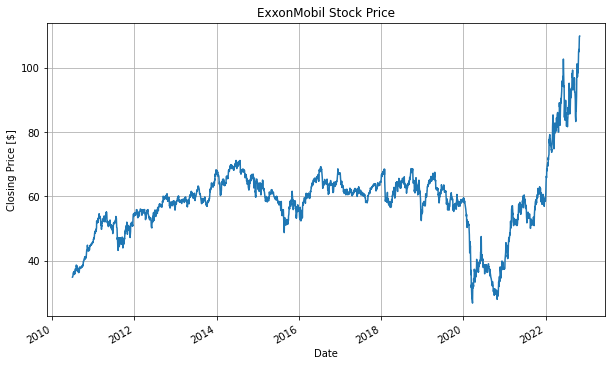

In [7]:
# Plot price data

hist['Close'].plot(title='ExxonMobil Stock Price', ylabel='Closing Price [$]', figsize=[10,6])
plt.grid()

In [8]:
# Create day count, Price, and Change lists

days = [i for i in range(1, len(hist['Close'])+1)]
price_orig = hist['Close'].tolist()
change = hist['Close'].pct_change().tolist()
change = change[1:]  # removes the first term since it is NaN


In [9]:
# Stats to use in the model

mean = np.mean(change)
std_dev = np.std(change)

print('\nMean % change: ' +str(round(mean*100,2))+ '%')
print('Standard Deviaiton of % change: ' + str(round(std_dev*100, 2))+ '%')


Mean % change: 0.05%
Standard Deviaiton of % change: 1.61%


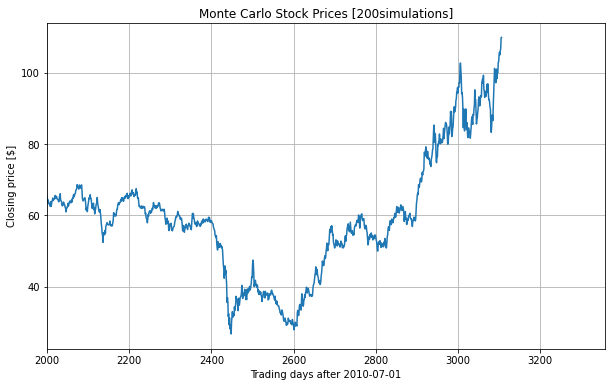

In [18]:
# Simulation number and Prediction Period

simulations = 200  # change for more results
days_to_sim = 1*252 # trading days in 1 year

# Initialize figure for simulation

fig = plt.figure(figsize=[10,6])
plt.plot(days, price_orig)
plt.title('Monte Carlo Stock Prices [' + str(simulations) + 'simulations]')
plt.xlabel('Trading days after ' +start_date)
plt.ylabel('Closing price [$]')
plt.xlim([2000, len(days) + days_to_sim])
plt.grid()


In [11]:
# Initialize list for analysis

close_end =[]
above_close = []

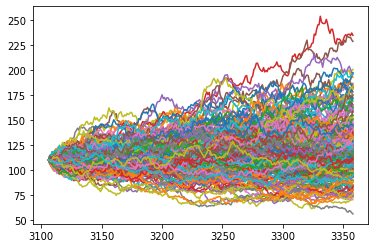

In [13]:
# for loop for number of simulations desired

for i in range(simulations):
  num_days = [days[-1]]
  close_price = [hist.iloc[-1,0]]

  # for loop for number of days to predict
  for j in range(days_to_sim):
    num_days.append(num_days[-1]+1)
    perc_change = norm.ppf(random(), loc=mean, scale=std_dev)
    close_price.append(close_price[-1]*(1+perc_change))

  if close_price[-1] > price_orig[-1]:
    above_close.append(1)
  else:
    above_close.append(0)

  close_end.append(close_price[-1])
  plt.plot(num_days, close_price)



In [16]:
# Avg closing price and probability of increasing after 1-year

average_closing_price = sum(close_end)/simulations
average_perc_change = (average_closing_price - price_orig[-1]) / price_orig[-1]
probability_of_increase = sum(above_close)/simulations

print('\nPredicted closing price after ' + str(simulations) + ' simulations: $' +str(round(average_closing_price,2)))
print('Predicted percent increase after 1-year: ' + str(round(average_perc_change*100, 2)) + '%')
print('Probability of stock price increasing after 1-year: ' + str(round(probability_of_increase*100, 2)) + '%')




Predicted closing price after 200 simulations: $128.06
Predicted percent increase after 1-year: 16.5%
Probability of stock price increasing after 1-year: 66.0%


In [17]:
# display Monte Carlo simulation lines
plt.show()